<a href="https://colab.research.google.com/github/developdaniels/colab/blob/master/Duncan_Prestige_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Excercise

A survey on prestige of Canadian citizens with respect to their occupation can be found on the R-datasets (The link is in the code below). In this example you will read a R dataset into Google Colabs using the code below. Now use the linear regression from statsmodels to determine which variables have a potential impact on prestige. Note you will have to use more than 1 independent variable in your model and for this excercise leave out the ***type*** and and ***census*** variables.

When you have completed your analysis answer the questions [here](https://docs.google.com/forms/d/e/1FAIpQLSdRT45XpZM7rl2b5Ssnai_NaSXiNFGz8j9gkynUB43R35saLw/viewform?usp=sf_link)

In [0]:
import statsmodels.api as smd
duncan_prestige= smd.datasets.get_rdataset("Prestige", "carData")

#print(duncan_prestige.__doc__)
print(duncan_prestige.data.head(5))
#print(type(duncan_prestige.data))

                     education  income  women  prestige  census  type
gov.administrators       13.11   12351  11.16      68.8    1113  prof
general.managers         12.26   25879   4.02      69.1    1130  prof
accountants              12.77    9271  15.70      63.4    1171  prof
purchasing.officers      11.42    8865   9.11      56.8    1175  prof
chemists                 14.62    8403  11.68      73.5    2111  prof


/usr/local/lib/python3.6/dist-packages/statsmodels/datasets/utils.py:185: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


# **Imports**

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.DataFrame()
df['prestige'] = duncan_prestige.data['prestige']
df['income'] = duncan_prestige.data['income']
df['log_income'] = np.log(duncan_prestige.data['income'])
df['education'] = duncan_prestige.data['education']
df['women'] = duncan_prestige.data['women']


# **Plots of prestige vs all, in order to see which variables has correlation**

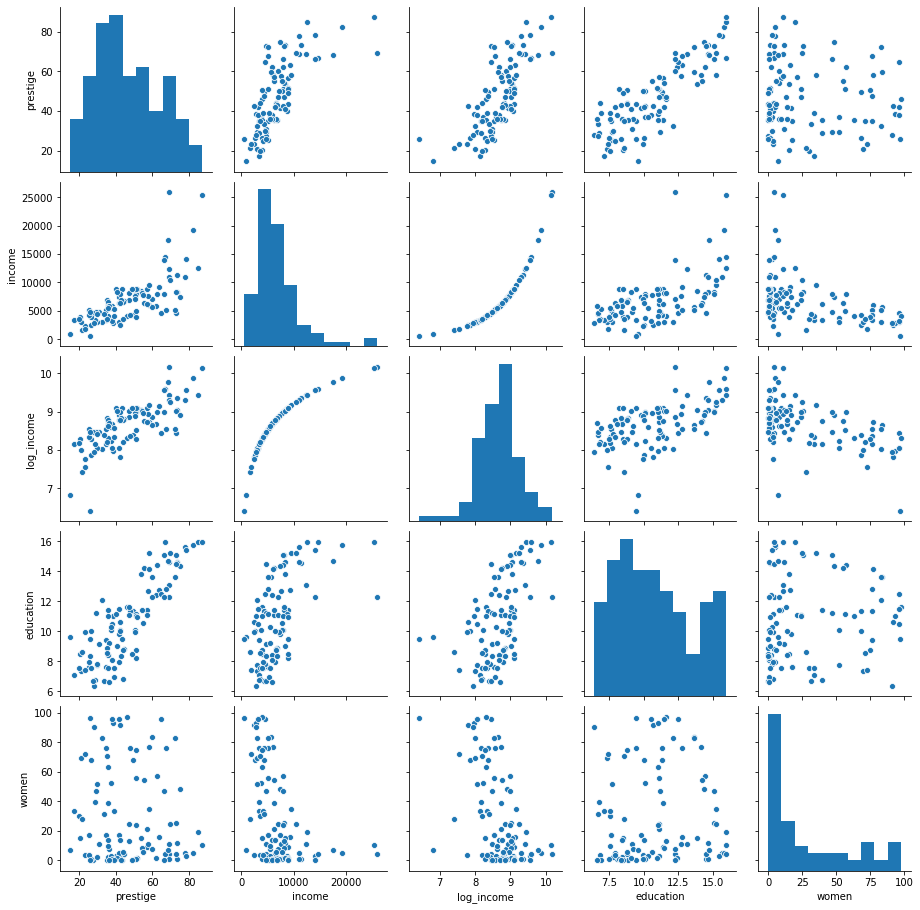

In [0]:
#sns.jointplot(x='prestige',y='income',data=df)
#sns.jointplot(x='prestige',y='log_income',data=df)
#sns.jointplot(x='prestige',y='education',data=df)
#sns.jointplot(x='prestige',y='women',data=df)
sns.pairplot(data=df)

# **Another way to find correlation**

In [0]:
df.corr()

#1–0.8 → Very strong
#0.799–0.6 → Strong
#0.599–0.4 → Moderate
#0.399–0.2 → Weak
#0.199–0 → Very Weak

,prestige,income,log_income,education,women
prestige,1.000000,0.714906,0.741056,0.850177,-0.118334
income,0.714906,1.000000,0.887259,0.577580,-0.441059
log_income,0.741056,0.887259,1.000000,0.548105,-0.522544
education,0.850177,0.577580,0.548105,1.000000,0.061853
women,-0.118334,-0.441059,-0.522544,0.061853,1.000000


# **We can note that log_income is better than income (more linear). Women has no correlation at all.**

In [0]:
#best linear regression => prestige~log_income+education

import statsmodels.formula.api as sm
formula_str="prestige~education+log_income"
#print(df.describe())
result=sm.ols(formula=formula_str,data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           6.11e-39
Time:                        18:58:18   Log-Likelihood:                -343.78
No. Observations:                 102   AIC:                             693.6
Df Residuals:                      99   BIC:                             701.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -95.1940     10.998     -8.656      0.0

In [0]:
#bad linear regression => prestige~income+education+women

import statsmodels.formula.api as sm
formula_str="prestige~income+education+women"
#print(df.describe())
result=sm.ols(formula=formula_str,data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           6.26e-34
Time:                        18:58:13   Log-Likelihood:                -352.82
No. Observations:                 102   AIC:                             713.6
Df Residuals:                      98   BIC:                             724.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7943      3.239     -2.098      0.0

# **What is the difference?**

**coefficient**=> how much each variable impact on the dependent variable

**P>|t|** => Is the p-value. 0.05 informs we have 95% of precision. Lower is better

**R-squared**=> The percentage of variance our model explains. Explains x% of the variance of the dependent variable

**Adjusted. R-squared**=> reflects the fit of the model. Near to 1 is a better fit, assuming some conditions are met.

**the standard error** => reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy

**t scores**=> 

**Confidence Interval**=> represents the range in which our coefficients are likely to fall (with a likelihood of 95%)




In [0]:
#y = df[['log_income','education']]
#x = df['Prestige']

#sns.lmplot(x=y,y=x,data=df)

,prestige,income,log_income,education,women
prestige,1.000000,0.714906,0.741056,0.850177,-0.118334
income,0.714906,1.000000,0.887259,0.577580,-0.441059
log_income,0.741056,0.887259,1.000000,0.548105,-0.522544
education,0.850177,0.577580,0.548105,1.000000,0.061853
women,-0.118334,-0.441059,-0.522544,0.061853,1.000000
